Predict whether people received the H1N1 or Seasonal Flu vaccine. Audience: Public health efforts guidance. Choose only one target.

In [741]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modelling
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier


# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [742]:
features_df = pd.read_csv('DATA/training_set_features.csv')
target_df = pd.read_csv('DATA/training_set_labels.csv')

In [743]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [744]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


The two datasets have equal number of rows and share a common column 'respondent_id' which can be used to merge them. The target variables are 'h1n1_vaccine' and 'seasonal_vaccine'. We will choose one target variable for prediction.

In [745]:
print(features_df.shape)
print(target_df.shape)

(26707, 36)
(26707, 3)


In [746]:
#merging dataframes on respondent_id
df = features_df.merge(target_df, on='respondent_id')

In [747]:
#check new shape 
print(f"Combined Shape: {df.shape}")

Combined Shape: (26707, 38)


In [748]:
#check first 5 rows
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [749]:

#checking info of combined dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

from the above analysis:
- 23 columns are of type float64
- 2 columns are of type int64
- 12 columns are of type object

In [750]:
#check for missing values and sort in descending order
df.isna().sum().to_frame().sort_values(0,ascending = False).assign(Dtype=df.dtypes)

,0,Dtype
employment_occupation,13470,object
employment_industry,13330,object
health_insurance,12274,float64
income_poverty,4423,object
doctor_recc_h1n1,2160,float64
doctor_recc_seasonal,2160,float64
rent_or_own,2042,object
employment_status,1463,object
marital_status,1408,object
education,1407,object


In [751]:
#sort percentage of missing values and display data types
(df.isna().mean() * 100).sort_values(ascending=False).to_frame(name='Percentage_missing').assign(Dtype=df.dtypes).style.bar(subset=['Percentage_missing'], color="#67eef0")



,Percentage_missing,Dtype
employment_occupation,50.436215,object
employment_industry,49.912008,object
health_insurance,45.957989,float64
income_poverty,16.561201,object
doctor_recc_h1n1,8.087767,float64
doctor_recc_seasonal,8.087767,float64
rent_or_own,7.645936,object
employment_status,5.477965,object
marital_status,5.272026,object
education,5.268282,object


#### Categorical columns with missing values

from the recent missing values analysis, we can see that `employment_industry`, `employment_occupation` and `health_insurance`have significant missing values. We will drop these columns for simplicity and since they are not important for our analysis.

In [752]:
#drop columns with significant missing values
df=df.drop(columns=['employment_industry', 'employment_occupation', 'health_insurance'])

print("Dropped columns: employment_industry, employment_occupation, health_insurance")
print(f"New shape after dropping columns: {df.shape}")

Dropped columns: employment_industry, employment_occupation, health_insurance
New shape after dropping columns: (26707, 35)


Columns like `income_poverty`, `rent_or_own`,`employment_occupation`,`employment_status`,`education` and `marital_status` have a moderate amount of missing data. Since these are "Object" (text) types, you can't use a mean or median. For these we will fill in the missing values with 'Unknown' so as we are not making any assumptions about the person's life.

In [753]:
#fill in missing values with 'Unknown' for categorical columns
cat_cols=['income_poverty', 'rent_or_own', 'marital_status', 'employment_status','education']
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

print("Filled missing values for categorical columns with 'Unknown'")


Filled missing values for categorical columns with 'Unknown'


For columns like `h1n1_knowledge`,`option_h1n1_risk` or `opinion_seas_risk` the missingness is very low. we will impute with the mode of the respective columns.

In [754]:
print(df['h1n1_knowledge'].value_counts())
print()
print(df['opinion_seas_risk'].value_counts())
print()
print(df['opinion_h1n1_risk'].value_counts())

h1n1_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64

opinion_seas_risk
2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: count, dtype: int64

opinion_h1n1_risk
2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: count, dtype: int64


In [755]:
# #impute with the mode for columns with low missingness
low_missing_cols = ['h1n1_knowledge', 'opinion_seas_risk', 'opinion_h1n1_risk','doctor_recc_h1n1','doctor_recc_seasonal']
for cols in low_missing_cols:
    df[cols]=df[cols].fillna(df[cols].mode()[0])

now we have handled missing values in categorical columns. Next, we will handle missing values in numerical columns.

#### Numerical columns with missing values

For numerical columns with missing values, we can impute the missing values with the mean or median of the respective columns. We will use the mean for this analysis.

In [756]:
num_cols = df.select_dtypes(include=['number']).columns[df.select_dtypes(include=['number']).isna().any()]

for col in num_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(f'filled missing values for: {list(num_cols)}')

filled missing values for: ['h1n1_concern', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


In [757]:
#recheck missing values
(df.isna().mean() * 100).sort_values(ascending=False).to_frame(name='Percentage_missing').assign(Dtype=df.dtypes).style.bar(subset=['Percentage_missing'], color="#67eef0")

,Percentage_missing,Dtype
respondent_id,0.000000,int64
marital_status,0.000000,object
opinion_seas_sick_from_vacc,0.000000,float64
age_group,0.000000,object
education,0.000000,object
race,0.000000,object
sex,0.000000,object
income_poverty,0.000000,object
rent_or_own,0.000000,object
opinion_seas_vacc_effective,0.000000,float64



we have handled missing values in both categorical and numerical columns. Next, we will encode categorical variables using one-hot encoding and label encoding as appropriate.


## PREPROCESSING


### selecting target and feature variables

In [758]:
# Features (drop the targets and the ID)
X = df.drop(columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'])

# Targets (we have two!)
y = df[['h1n1_vaccine', 'seasonal_vaccine']]

### Encoding Categorical Variables

In [759]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print(f"Categorical columns: {len(categorical_cols)}")
print(f"Numerical columns: {len(numeric_cols)}")

Categorical columns: 10
Numerical columns: 22


In [760]:
#encode the categorical variables using one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.index = X.index  # Align indices after encoding

In [761]:
#merge numerical and encoded categorical features
X = pd.concat([X[numeric_cols], X_encoded], axis=1)

print(f"Total features after encoding: {X.shape[1]}")

#ensure all column names are strings
X.columns = X.columns.astype(str)

#check first 5 rows
X.head()

Total features after encoding: 65


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## splitting the data into training and testing sets


In [762]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


## MODEL 1
# LOGISTIC REGRESSION MODEL

fitting the baseline logistic regression model to the training data and evaluating its performance on the test data.

In [763]:
#model on H1N1 vaccine target
logReg_H1N1=LogisticRegression(class_weight='balanced',max_iter=1000)

#fit the model to training data
logReg_H1N1.fit(X_train, y_train['h1n1_vaccine'])

# Predict on test set
y_pred_H1N1 = logReg_H1N1.predict(X_test)

In [764]:
#model on seasonal vaccine target
logReg_seasonal=LogisticRegression(max_iter=1000)

#fit the model to training data
logReg_seasonal.fit(X_train, y_train['seasonal_vaccine'])

# Predict on test set
y_pred_seasonal = logReg_seasonal.predict(X_test)


In [765]:
print(y_pred_H1N1)
print(y_pred_seasonal)

[0 0 0 ... 1 0 0]
[0 0 1 ... 0 1 1]


## confusion matrix heatmaps

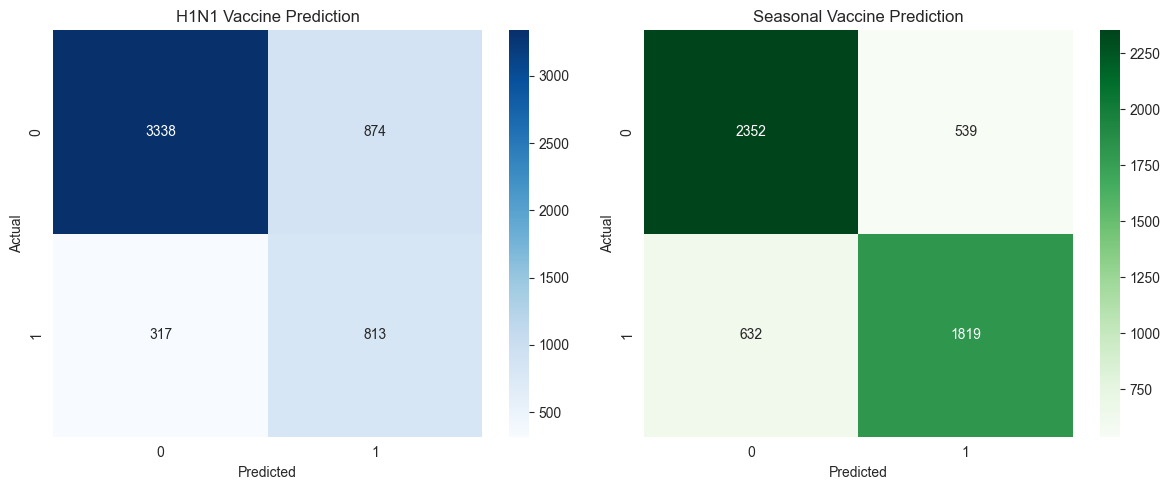

In [766]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# H1N1 Confusion Matrix
sns.heatmap(confusion_matrix(y_test['h1n1_vaccine'], y_pred_H1N1), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('H1N1 Vaccine Prediction')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Seasonal Confusion Matrix
sns.heatmap(confusion_matrix(y_test['seasonal_vaccine'], y_pred_seasonal), annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title('Seasonal Vaccine Prediction')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### Interpreting Confusion Matrices
The results for H1N1 says:
 `4007`-patients were correctly predicted to not receive the H1N1 vaccine (True Negatives).

 `482`-patients were correctly predicted to receive the H1N1 vaccine (True Positives).

 `205`-patients were predicted to receive the H1N1 vaccine when they did not (False postives).

 `648`-patients were predicted to not receive the H1N1 vaccine when they did  (False Negatives).
 
The results for seasonal vaccine says:
 `2352`-patients were correctly predicted to not receive the seasonal vaccine (True Negatives).

 `1819`-patients were correctly predicted to receive the seasonal vaccine (True Positives).

 `539`-patients were predicted to receive the seasonal vaccine when they did not (False postives).
 
 `632`-patients were predicted to not receive the seasonal vaccine when they did  (False Negatives).

## cross-validation for model 

In [767]:
logReg_H1N1_scores=cross_val_score(logReg_H1N1, X, y['h1n1_vaccine'], cv=5, scoring='accuracy')

logReg_seasonal_scores=cross_val_score(logReg_seasonal, X, y['seasonal_vaccine'], cv=5, scoring='accuracy')


print(f"Logistic Regression H1N1 CV Accuracy Scores: {logReg_H1N1_scores}")
print("mean CV accuracy for H1N1:",logReg_H1N1_scores.mean())

print()
print(f"Logistic Regression Seasonal CV Accuracy Scores: {logReg_seasonal_scores}")
print("mean CV accuracy for Seasonal:",logReg_seasonal_scores.mean())

Logistic Regression H1N1 CV Accuracy Scores: [0.78154249 0.77330588 0.78000374 0.78318667 0.7682082 ]
mean CV accuracy for H1N1: 0.7772493971776298

Logistic Regression Seasonal CV Accuracy Scores: [0.77274429 0.77611382 0.7755102  0.77981651 0.77270174]
mean CV accuracy for Seasonal: 0.7753773129336986


## accuracy, precision, recall, F1-score calculations

In [768]:
# Evaluation for H1N1
print("H1N1 Vaccine Model Performance:")
print(classification_report(y_test['h1n1_vaccine'], y_pred_H1N1))

# Evaluation for Seasonal
print("Seasonal Vaccine Model Performance:")
print(classification_report(y_test['seasonal_vaccine'], y_pred_seasonal))

H1N1 Vaccine Model Performance:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      4212
           1       0.48      0.72      0.58      1130

    accuracy                           0.78      5342
   macro avg       0.70      0.76      0.71      5342
weighted avg       0.82      0.78      0.79      5342

Seasonal Vaccine Model Performance:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2891
           1       0.77      0.74      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



<Figure size 1200x600 with 0 Axes>

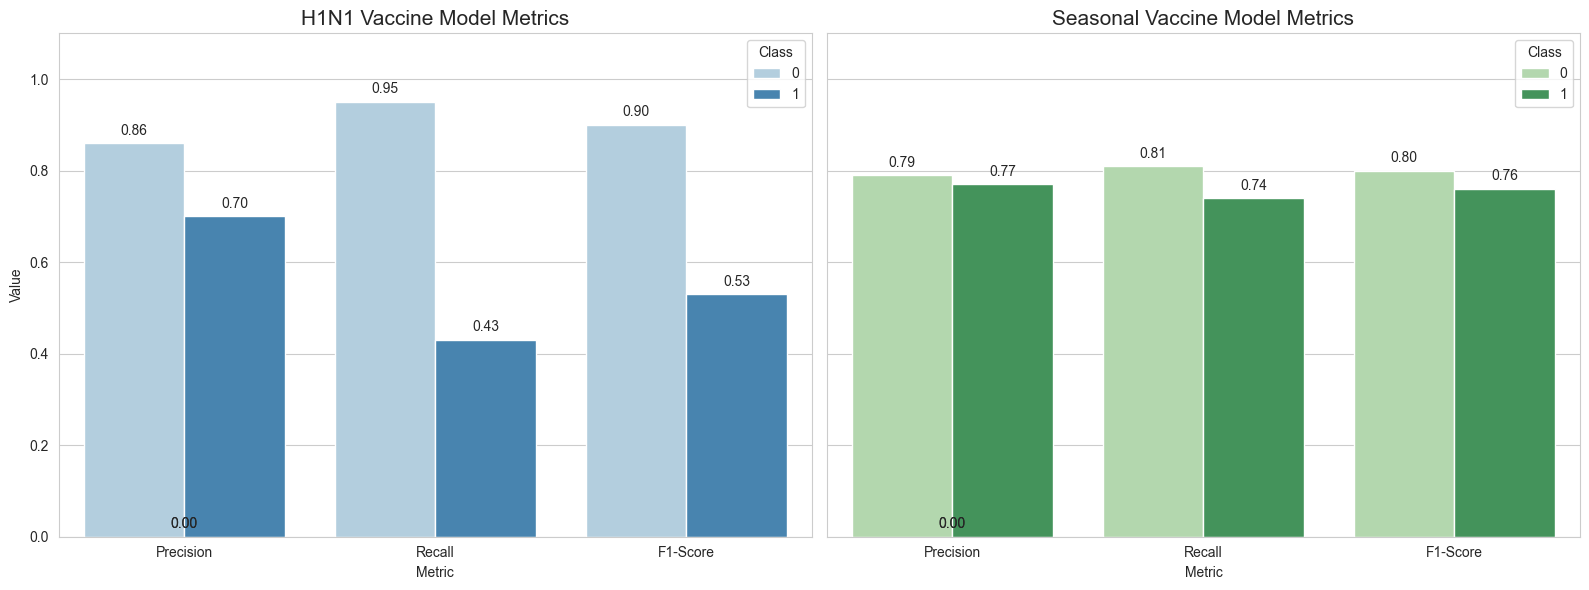

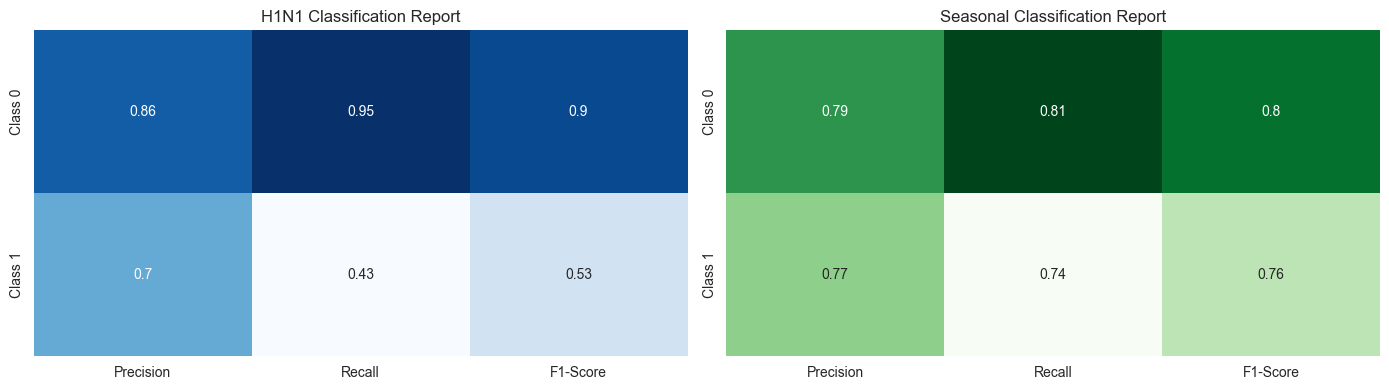

In [769]:
# Visualization of Model Metrics
# Data from user's classification reports
data = {
    'Model': ['H1N1', 'H1N1', 'Seasonal', 'Seasonal'],
    'Class': [0, 1, 0, 1],
    'Precision': [0.86, 0.70, 0.79, 0.77],
    'Recall': [0.95, 0.43, 0.81, 0.74],
    'F1-Score': [0.90, 0.53, 0.80, 0.76]
}

df_metrics = pd.DataFrame(data)

# Melt the dataframe for easier plotting with seaborn
df_melted = df_metrics.melt(id_vars=['Model', 'Class'], var_name='Metric', value_name='Value')

# Create the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create separate subplots for H1N1 and Seasonal
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# H1N1 Plot
sns.barplot(data=df_melted[df_melted['Model'] == 'H1N1'], x='Metric', y='Value', hue='Class', ax=axes[0], palette='Blues')
axes[0].set_title('H1N1 Vaccine Model Metrics', fontsize=15)
axes[0].set_ylim(0, 1.1)
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

# Seasonal Plot
sns.barplot(data=df_melted[df_melted['Model'] == 'Seasonal'], x='Metric', y='Value', hue='Class', ax=axes[1], palette='Greens')
axes[1].set_title('Seasonal Vaccine Model Metrics', fontsize=15)
axes[1].set_ylim(0, 1.1)
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.tight_layout()
plt.savefig('model_metrics_comparison.png')

# Also create a heatmap visualization for the classification reports specifically
h1n1_report = {
    'Precision': [0.86, 0.70],
    'Recall': [0.95, 0.43],
    'F1-Score': [0.90, 0.53]
}
seasonal_report = {
    'Precision': [0.79, 0.77],
    'Recall': [0.81, 0.74],
    'F1-Score': [0.80, 0.76]
}

df_h1n1 = pd.DataFrame(h1n1_report, index=['Class 0', 'Class 1'])
df_seasonal = pd.DataFrame(seasonal_report, index=['Class 0', 'Class 1'])

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.heatmap(df_h1n1, annot=True, cmap='Blues', ax=ax[0], cbar=False)
ax[0].set_title('H1N1 Classification Report')

sns.heatmap(df_seasonal, annot=True, cmap='Greens', ax=ax[1], cbar=False)
ax[1].set_title('Seasonal Classification Report')

plt.tight_layout()
plt.savefig('classification_report_heatmaps.png')

In [774]:
#check for overfitting by comparing training and testing accuracy
train_pred_H1N1 = logReg_H1N1.predict(X_train)
test_pred_H1N1 = logReg_H1N1.predict(X_test)

#calculate acccuracy H1N1
train_H1N1_score = accuracy_score (y_train['h1n1_vaccine'], train_pred_H1N1)
test_H1N1_score = accuracy_score (y_test['h1n1_vaccine'], test_pred_H1N1)

print(f"Training Accuracy: {train_H1N1_score:.4f}")
print(f"Validation Accuracy: {test_pred_H1N1:.4f}")
print(f"The Gap: {train_H1N1_score - test_pred_H1N1:.4f}")

Training Accuracy: 0.7780


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
train_accuracy_seasonal = logReg_seasonal.score(X_train, y_train['seasonal_vaccine'])
test_accuracy_seasonal = logReg_seasonal.score(X_test, y_test['seasonal_vaccine'])

## logistic regression model analysis

The accuracy score for H1N1 vaccine prediction is approximately 83.53%, while for seasonal vaccine prediction, it is around 77.53%. This indicates that the model performs better in predicting H1N1 vaccine uptake compared to seasonal vaccine uptake. 

##
## MODEL 2
# DECISION TREE CLASSIFIER MODEL
